# Daily Financial News for 6000+ Stocks
## Some Data Preparation
@author DHR <br>
### a bit of Data Uderstanding
used Data in this Notebook: 'https://www.kaggle.com/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests'

import requiered modules

In [18]:
#immport basic DataScience Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Load Data

In [36]:
data = pd.read_csv('../data/raw_analyst_ratings.csv')
#colums: id,headline,url,publisher,date,stock

In [5]:
print(data.columns)
data.head()

Index(['id', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


id                                           headline  \
0   0            Stocks That Hit 52-Week Highs On Friday   
1   1         Stocks That Hit 52-Week Highs On Wednesday   
2   2                      71 Biggest Movers From Friday   
3   3       46 Stocks Moving In Friday's Mid-Day Session   
4   4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00     A  
3  2020-05-22 12:45:06-04:00     A  
4  2020-05-22 11:38:59-04:00     A

In [6]:
print("observations: {}, features: {} \n".format(data.shape[0], data.shape[1]))
print("unique headlines: {}, unique stocks: {} \n".format(len(data.headline.unique()), len(data.stock.unique())))

observations: 1407328, features: 6 

unique headlines: 845770, unique stocks: 6204 



In [40]:
stock = data.groupby("stock")


'2009-04-29 00:00:00'

Data Visualization

In [32]:
date = data.groupby("date")

id  \
date                                 
2009-02-14 00:00:00         883755   
2009-04-27 00:00:00        1396488   
2009-04-29 00:00:00           1834   
2009-05-22 00:00:00          68387   
2009-05-27 00:00:00        1081067   
...                            ...   
2020-06-11 16:49:41-04:00  1044115   
2020-06-11 16:51:33-04:00  1363985   
2020-06-11 17:01:39-04:00  1275136   
2020-06-11 17:11:20-04:00   985369   
2020-06-11 17:12:35-04:00  1350029   

                                                                    headline  \
date                                                                           
2009-02-14 00:00:00                             How Treasuries and ETFs Work   
2009-04-27 00:00:00            Update on the Luxury Sector: 2nd Quarter 2009   
2009-04-29 00:00:00                                   Going Against the Herd   
2009-05-22 00:00:00        Charles Sizemore Radio Interview Saturday Morning   
2009-05-27 00:00:00        MRM a $15-$20+ stock - FIT new information - J...   
...                                                                      ...   
2020-06-11 16:49:41-04:00  7 Stocks Moving In Thursday's After-Hours Session   
2020-06-11 16:51:33-04:00  Financials, Energy Among Worst-Hit Sectors In ...   
2020-06-11 17:01:39-04:00  Twitter Removes About 174,000 China-Linked Acc...   
2020-06-11 17:11:20-04:00  PG&E Corp Reports CPUC Approved Co.'s Microgri...   
2020-06-11 17:12:35-04:00                 Quicken Loans Plans To IPO: Report   

                                                                         url  \
date                                                                           
2009-02-14 00:00:00        https://www.benzinga.com/28044/how-treasuries-...   
2009-04-27 00:00:00        https://www.benzinga.com/charles-lewis-sizemor...   
2009-04-29 00:00:00        https://www.benzinga.com/charles-lewis-sizemor...   
2009-05-22 00:00:00        https://www.benzinga.com/11218/charles-sizemor...   
2009-05-27 00:00:00        https://www.benzinga.com/superman/2009/5/27/mr...   
...                                                                      ...   
2020-06-11 16:49:41-04:00  https://www.benzinga.com/news/20/06/16237924/7...   
2020-06-11 16:51:33-04:00  https://www.benzinga.com/news/20/06/16238109/f...   
2020-06-11 17:01:39-04:00  https://www.benzinga.com/tech/20/06/16238284/t...   
2020-06-11 17:11:20-04:00  https://www.benzinga.com/news/20/06/16238398/p...   
2020-06-11 17:12:35-04:00  https://www.benzinga.com/news/20/06/16238300/q...   

                                            publisher stock  
date                                                         
2009-02-14 00:00:00                      Paco Ahlgren   NAV  
2009-04-27 00:00:00        Charles Lewis Sizemore CFA     Y  
2009-04-29 00:00:00        Charles Lewis Sizemore CFA     A  
2009-05-22 00:00:00        Charles Lewis Sizemore CFA    AM  
2009-05-27 00:00:00                          superman    RF  
...                                               ...   ...  
2020-06-11 16:49:41-04:00                Tyree Gorges   PVH  
2020-06-11 16:51:33-04:00                  JJ Kinahan   WMT  
2020-06-11 17:01:39-04:00           Benzinga Newsdesk  TWTR  
2020-06-11 17:11:20-04:00           Benzinga Newsdesk   PCG  
2020-06-11 17:12:35-04:00              Jason Shubnell   WFC  

[39957 rows x 5 columns]

In [38]:
#import optional Packages
from wordcloud import WordCloud, STOPWORDS
import nltk #tokenization
#nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to C:\Users\Dominik
[nltk_data]     Höhr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Text(0, 0.5, 'Number of Headlines')

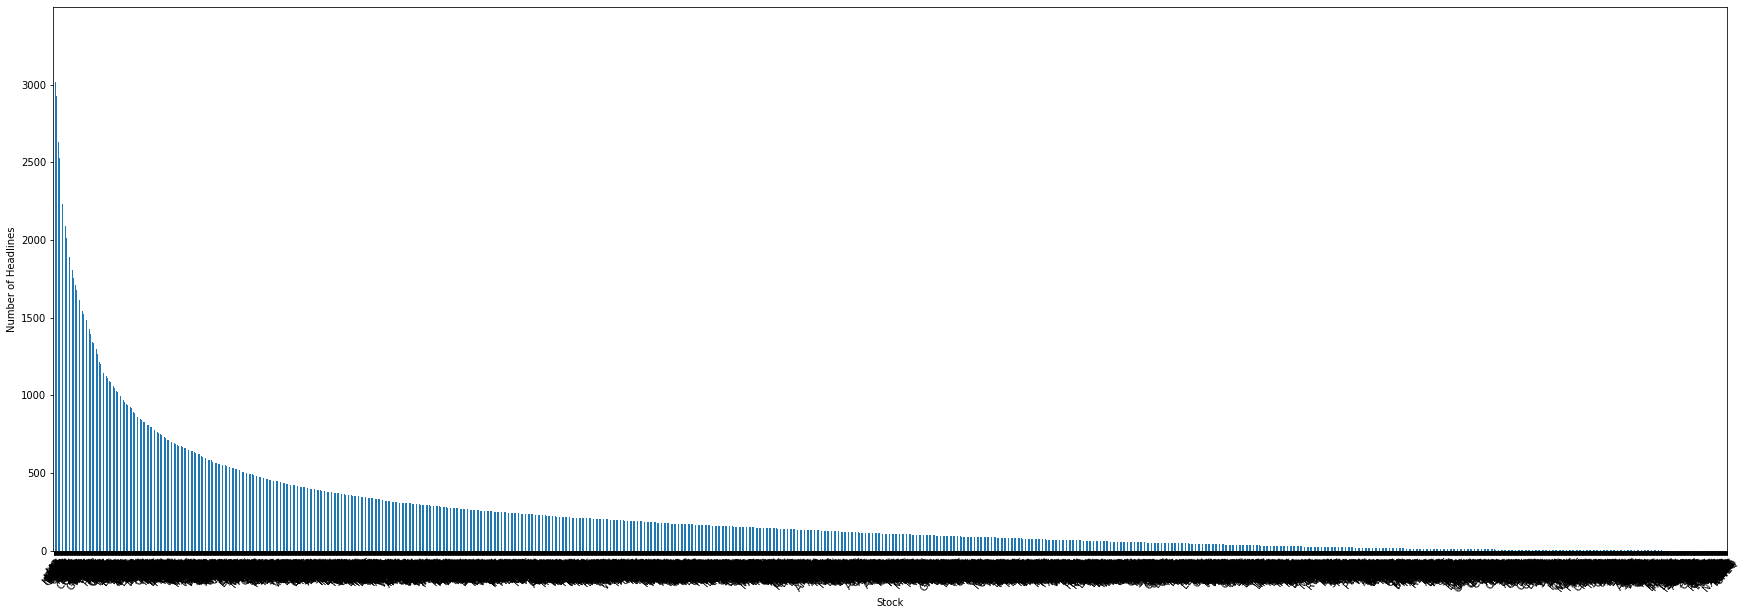

In [9]:
#number of headlines by stock
plt.figure(figsize=(30,10))
stock.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Stock")
plt.ylabel("Number of Headlines")

In [34]:
#Termdocument Matrix
docs = []
for headline in data.headline:
    docs.append(headline)
docs = docs[0:100]
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)



    10  100  11  12  13f  15  164  18  2019  2020  ...  which  while  white  \
0    0    0   0   0    0   0    0   0     0     0  ...      0      0      0   
1    0    0   0   0    0   0    0   0     0     0  ...      0      0      0   
2    0    0   0   0    0   0    0   0     0     0  ...      0      0      0   
3    0    0   0   0    0   0    0   0     0     0  ...      0      0      0   
4    0    0   0   0    0   0    0   0     0     0  ...      0      0      0   
..  ..  ...  ..  ..  ...  ..  ...  ..   ...   ...  ...    ...    ...    ...   
95   0    0   0   0    0   0    0   0     0     0  ...      0      0      0   
96   0    0   0   0    0   1    0   0     0     0  ...      0      0      0   
97   0    0   0   0    0   0    0   0     0     0  ...      0      0      0   
98   0    0   0   0    0   0    0   0     0     0  ...      0      0      0   
99   0    0   0   0    0   0    0   0     0     0  ...      0      0      0   

    will  with  withdraws  worth  year  yo  yoy  
0

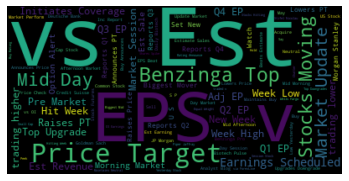

In [15]:
#Wordcloud
#combine all headlines to one text
text = " ".join(headline for headline in data.headline)

stopwords = STOPWORDS
stopwords.update(["Benzinga, Stocks"])
wordcloud = WordCloud(stopwords=stopwords, max_words=100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("../data/wordcloud.png")

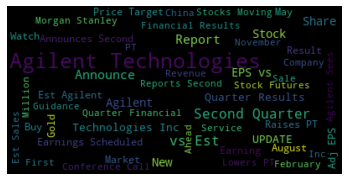

In [17]:
#Wordcloud for a Stock
text_stock = " ".join(headline for headline in data[data["stock"]=="A"].headline)

stopwords = STOPWORDS
stopwords.update(["Benzinga, stocks"])
wordcloud = WordCloud(stopwords=stopwords, max_words=50).generate(text_stock)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("../data/wordcloud_specificStock.png")

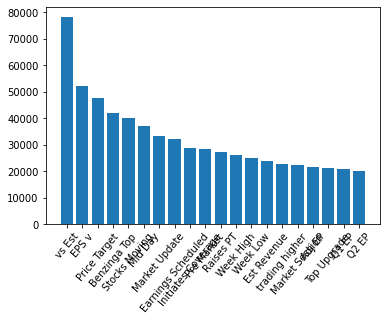

In [14]:
#Top Words
wordFreq = WordCloud().process_text(text)
wordFreq = dict(sorted(wordFreq.items(), key=lambda item: item[1], reverse=True)[:20])

plt.bar(range(len(wordFreq)), list(wordFreq.values()), align='center')
plt.xticks(range(len(wordFreq)), list(wordFreq.keys()), rotation=50)
plt.show()

Topic Modelling ?

In [62]:
import re
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import gensim

In [53]:
# Remove punctuation
data['headline_processed'] = \
data['headline'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data['headline_processed'] = \
data['headline_processed'].map(lambda x: x.lower())

In [55]:
stop_words = stopwords.words('english')
stop_words.extend(['bezinga', 'stock'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
headline = data.headline_processed.values.tolist()
headline_words = list(sent_to_words(headline))
# remove stop words
headline_words = remove_stopwords(headline_words)



In [63]:
# Create Dictionary
id2word = corpora.Dictionary(headline_words)
# Create Corpus
texts = headline_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [64]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.045*"pt" + 0.037*"raises" + 0.037*"maintains" + 0.034*"buy" + '
  '0.033*"target" + 0.031*"price" + 0.023*"lowers" + 0.023*"neutral" + '
  '0.021*"downgrades" + 0.021*"morgan"'),
 (1,
  '0.019*"analyst" + 0.018*"capital" + 0.013*"blog" + 0.011*"perform" + '
  '0.010*"market" + 0.010*"update" + 0.009*"downgrades" + 0.008*"shares" + '
  '0.008*"energy" + 0.008*"cramer"'),
 (2,
  '0.077*"stocks" + 0.046*"market" + 0.039*"session" + 0.037*"moving" + '
  '0.033*"week" + 0.030*"day" + 0.027*"biggest" + 0.026*"mid" + 0.025*"pre" + '
  '0.024*"movers"'),
 (3,
  '0.020*"etfs" + 0.015*"reports" + 0.013*"watch" + 0.012*"terms" + '
  '0.012*"disclosed" + 0.009*"trade" + 0.009*"pro" + 0.008*"stake" + '
  '0.008*"benzinga" + 0.007*"purchase"'),
 (4,
  '0.062*"top" + 0.044*"benzinga" + 0.025*"stocks" + 0.022*"upgrades" + '
  '0.022*"downgrades" + 0.019*"industry" + 0.015*"highest" + 0.010*"cap" + '
  '0.010*"news" + 0.008*"biotech"'),
 (5,
  '0.056*"earnings" + 0.032*"scheduled" + 0.029*"sh

In [71]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results_ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results_ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

d:\Domink\Wokspaces\UPB\PredictiveAnalyticsStudienarbeit\env_jupyter_39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.004543  0.179293       1        1  15.138243
9      0.107207  0.074074       2        1  14.807915
0     -0.058371 -0.213631       3        1  12.073621
8     -0.333275 -0.003005       4        1  10.553392
5      0.080033  0.133179       5        1   9.284260
2      0.195166 -0.277179       6        1   8.867549
4      0.149900  0.066650       7        1   8.683205
1      0.009551  0.055340       8        1   8.473048
7     -0.145123 -0.077859       9        1   6.216293
3     -0.009633  0.063138      10        1   5.902475, topic_info=          Term           Freq          Total Category  logprob  loglift
264         vs  169591.000000  169591.000000  Default  30.0000  30.0000
262        est  146590.000000  146590.000000  Default  29.0000  29.0000
26         eps  132680.000000  132680.000000  Default  28.0000  28.0000
31       sales   84670.000000   84670.000000  Default  27.0000  27.0000
3       stocks  156383.000000  156383.000000  Default  26.0000  26.0000
..         ...            ...            ...      ...      ...      ...
67       shows    2692.405091   12921.695986  Topic10  -5.5425   1.2613
609      group    2894.433801   28540.928867  Topic10  -5.4702   0.5412
50         may    2703.545431   30523.847240  Topic10  -5.5384   0.4059
259  announces    2491.938019   72462.359505  Topic10  -5.6199  -0.5402
242        new    2434.293591   49976.282691  Topic10  -5.6433  -0.1921

[891 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
415        1  0.484577  acquire
415        2  0.071449  acquire
415        3  0.001415  acquire
415        4  0.007276  acquire
415        5  0.088427  acquire
...      ...       ...      ...
14774      7  0.998373   zafgen
12946      4  0.998560     zayo
19758      7  0.997234     znga
11112      4  0.997018   zulily
7591       2  0.999539    zynga

[4260 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 1, 9, 6, 3, 5, 2, 8, 4])

## API call
### complement data with Stock Prices
use API : 'https://polygon.io/'
(need timeouts because of max 5 Api calls per Minute)

In [25]:
from polygon import RESTClient
import datetime
import time

def unique(l):
    ## list of only the unique values from a given list
    x = np.array(l)
    return np.unique(x)

In [21]:
# pip install polygon-api-client (https://github.com/polygon-io/client-python)
# List of Stock Ticker to call

stocks = data[data.groupby('stock').stock.transform(len) > 10]
stocks_unique = unique(stocks['stock'])


In [ ]:
# API call with TimeOut (5 per minute)
key = 'grBCBHpUX9BL8Hsy1qWi61pPT60YN3pA'
results = []

for s in stocks_unique:
    #may curse error if intervall to big and API on this price level doesnt like that
    from_ = data['date'].loc[data['stock'] == s].min()
    to = data['date'].loc[data['stock'] == s].max()

    #The API call
    with RESTClient(key) as client:
            resp = client.stocks_equities_aggregates(s, 15, "minute", from_, to, unadjusted=False)
            # Array of Array
            for result in resp.results:
                dt = datetime.datetime.fromtimestamp(result['t'] / 1000.0).isoformat()
                results.append([s, dt, result['o'], result['h'], result['l'], result['c']])
    time.sleep(12)

stock_prices = pd.DataFrame(results, columns=['stock', 'time', 'o', 'h', 'l', 'c'])
stock_prices.to_csv('../data/raw_stock_prices.csv', encoding='utf-8', index=False)

In [ ]:
stock_prices = pd.read_csv('../data/raw_stock_prices.csv')

## Data Understanding

#### Fehlerhafte und Fehlende Daten

## Data Preparation